**The Objective of the Regression**

Abalone, a type of sea mollusk with a hard shell, is often prized for its nutritional value and delicious taste, particularly in Asia and America.

Predicting the age of abalone is essential for assessing the health of their populations and enabling effective fisheries management. This information allows authorities to make informed decisions to protect and sustain abalone populations.

The aim of this regression is to predict the age of an abalone that represented by the number of rings, with the information of some predictor variables above.

**Response Variables**
1. Rings
Rings refer to the concentric or growth lines on the abalone's shell. These indicates the age estimation of the abalone.

**Predictor Variables**
1. Sex
The sex of the abalone, M is 'Male', F is 'Female', and I is 'Infant'
2. Length
Length refer to the length of the abalone in mm.
3. Height
The height of the abalone in mm.
4. Whole weight
The whole weight of the abalone in grams, include the meat and the shell.
5. Whole weight 1 = Shucked weight
The weight of the abalone's meat only, measured in grams.
6. Whole weight 2 = Viscera weight
The weight of the abalone's gut after bleeding, measured in grams.
7. Shell weight
The weight of the abalone's shell only without the meat, measured in grams.



In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"inatantrinareswari","key":"925ffb3e5e0345b783b7100541c20311"}'}

In [24]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [25]:
!kaggle competitions download -c playground-series-s4e4
!unzip playground-series-s4e4.zip

playground-series-s4e4.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  playground-series-s4e4.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


**DATASET**

In [26]:
import pandas as pd
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission_sample = pd.read_csv('sample_submission.csv')

In [27]:
train_data.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [28]:
print(train_data.shape)
print(test_data.shape)

(90615, 10)
(60411, 9)


# Missing Value Checking

In [29]:
train_data.isnull().sum()

,0
id,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Whole weight.1,0
Whole weight.2,0
Shell weight,0
Rings,0


There is no missing values, so we can continue into the analysis

# **Descriptive Statistics**

In [30]:
#show statistical descriptive for each sex category
desc_stats = train_data.groupby('Sex').describe().stack(level=0, future_stack=True)
print(desc_stats)

                      count          mean           std     min         25%  \
Sex                                                                           
F   id              26495.0  45541.734025  26110.935512  0.0000  23020.0000   
    Length          26495.0      0.584330      0.071348  0.2300      0.5450   
    Diameter        26495.0      0.458219      0.059050  0.1300      0.4250   
    Height          26495.0      0.157194      0.027658  0.0500      0.1400   
    Whole weight    26495.0      1.051711      0.377650  0.0340      0.8130   
    Whole weight.1  26495.0      0.449880      0.175309  0.0145      0.3285   
    Whole weight.2  26495.0      0.227631      0.084946  0.0080      0.1705   
    Shell weight    26495.0      0.301273      0.107665  0.0090      0.2320   
    Rings           26495.0     11.161389      3.021624  1.0000      9.0000   
I   id              33093.0  45133.476898  26202.631507  2.0000  22340.0000   
    Length          33093.0      0.414792      0.104

Here is the detailed explanation of the descriptive statistics for each category of the 'Sex' variables.

**1. Count**
The count shows the number of observation for each category of 'Sex'. It indicates that the datasets has more infant abalones compared to male and female abalones, with female abalones being the least represented.

**2. Diameter, height, and length mean**
The mean value of diameter, height, and length are slightly larger for female abalones compared to male abalones. Infant abalones have significantly lower mean values, incicating they are smaller in size compared to adult abalones.

**3. Shell weight**
The mean shell weight of female abalones is greater than male abalones, suggest that female abalones have heavier shells on avegare.

**4. Rings**
The mean number of rings (age estimation) for female abalones is greater than female abalones by approximately 1 rings. This difference in age between male and abalones could be dua to differences in growth rates of life expectancy between the sexes.

# **EDA (EXPLORATORY DATA ANALYSIS)**

Boxplot is made for variable Sex to show the correlation between sex and the amount of rings. This was chosen cause Sex is a categorical variable while Rings is a numerical Variable

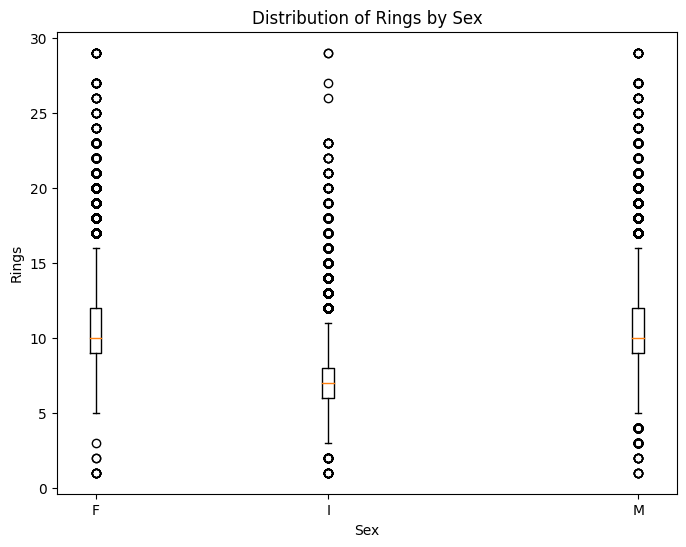

In [31]:
#boxplot for sex to show the correlation between sex and the amount of rings
plt.figure(figsize=(8,6))

for sex in train_data['Sex'].unique():
    plt.boxplot(train_data[train_data['Sex']==sex]['Rings'],
               positions = [ord(sex)], labels = [sex])

plt.xlabel('Sex')
plt.ylabel('Rings')
plt.title('Distribution of Rings by Sex')
plt.show()

From the boxplot, we can observed that the distribution and median of the number of rings for female and male abalones are similar, with both gender having median around 10-12 rings. In comparison, infant abalones have a slightly lower median, indicating they are younger on average. The range of rings varies from 1 to around 30, shows a wide range of ages within the dataset.

To show the relation between other variables and variable Ring, heatmap will be made. This plot was chosen all of them are numerical variables.

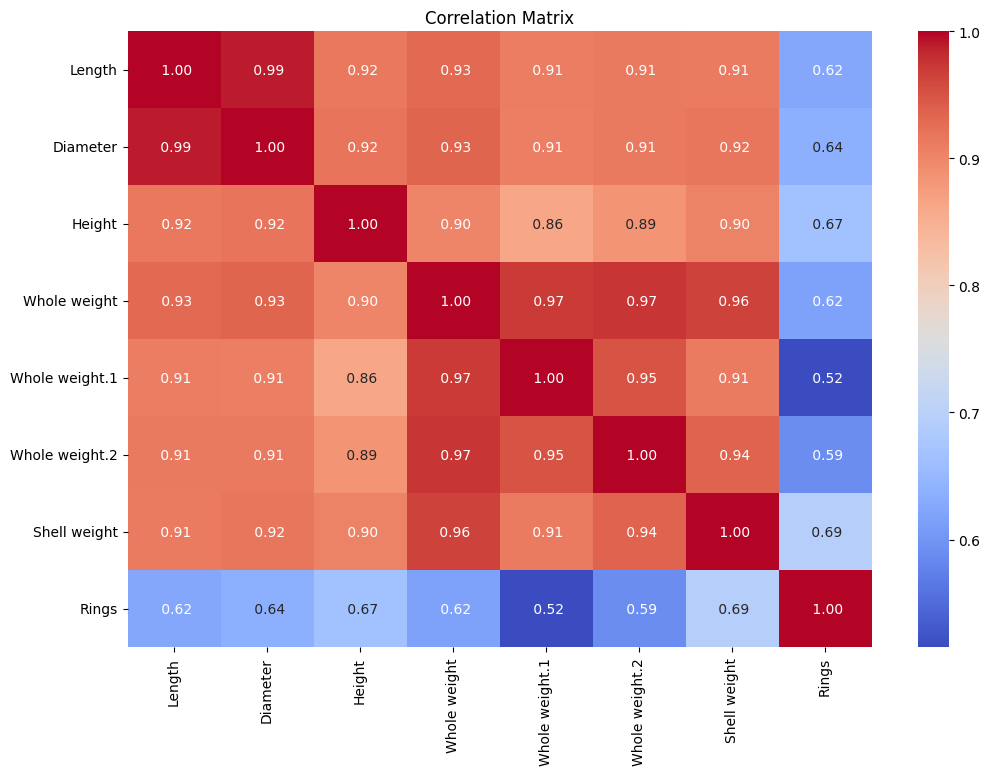

In [32]:
# Selected variables
variables = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings']

corr = train_data[variables].corr()

#create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = ' .2f')
plt.title('Correlation Matrix')
plt.show()

Between rings and numerical variables, the correlations are above 0.50. It indicates a moderate to strong positive linear relationship between those variables and the number of the rings of the abalone shell.

The highest correlation is between Rings and Shell Weight, that is 0.69. This tells that there is a strong positive linear relationship between these twi variables. When the number of rings increase, the weight of the abalone's shell tend to increase as well. Important note that this does not imply causation.

From the various correlation coefficients, it can be observed that there are high correlations between predictor variables, which can lead to multicollinearity, especially when the coefficients are mostly above 0.8. However, the average correlation between predictors and the number of rings is only around 0.6.

Multicollineariry itself is a condition where two or more predictor variables in regression model are highly correlated, meaning that one predictor variable can be linearly predicted from others with a substantial degree of accuracy. This issue can leads into unreliable estimates. What can we do to solve this is by using alternative method such as decision tree and random forest. These methods are not sensitive to multicollinearity because they do not assume linear relationship between the predictor variables and the response variables.

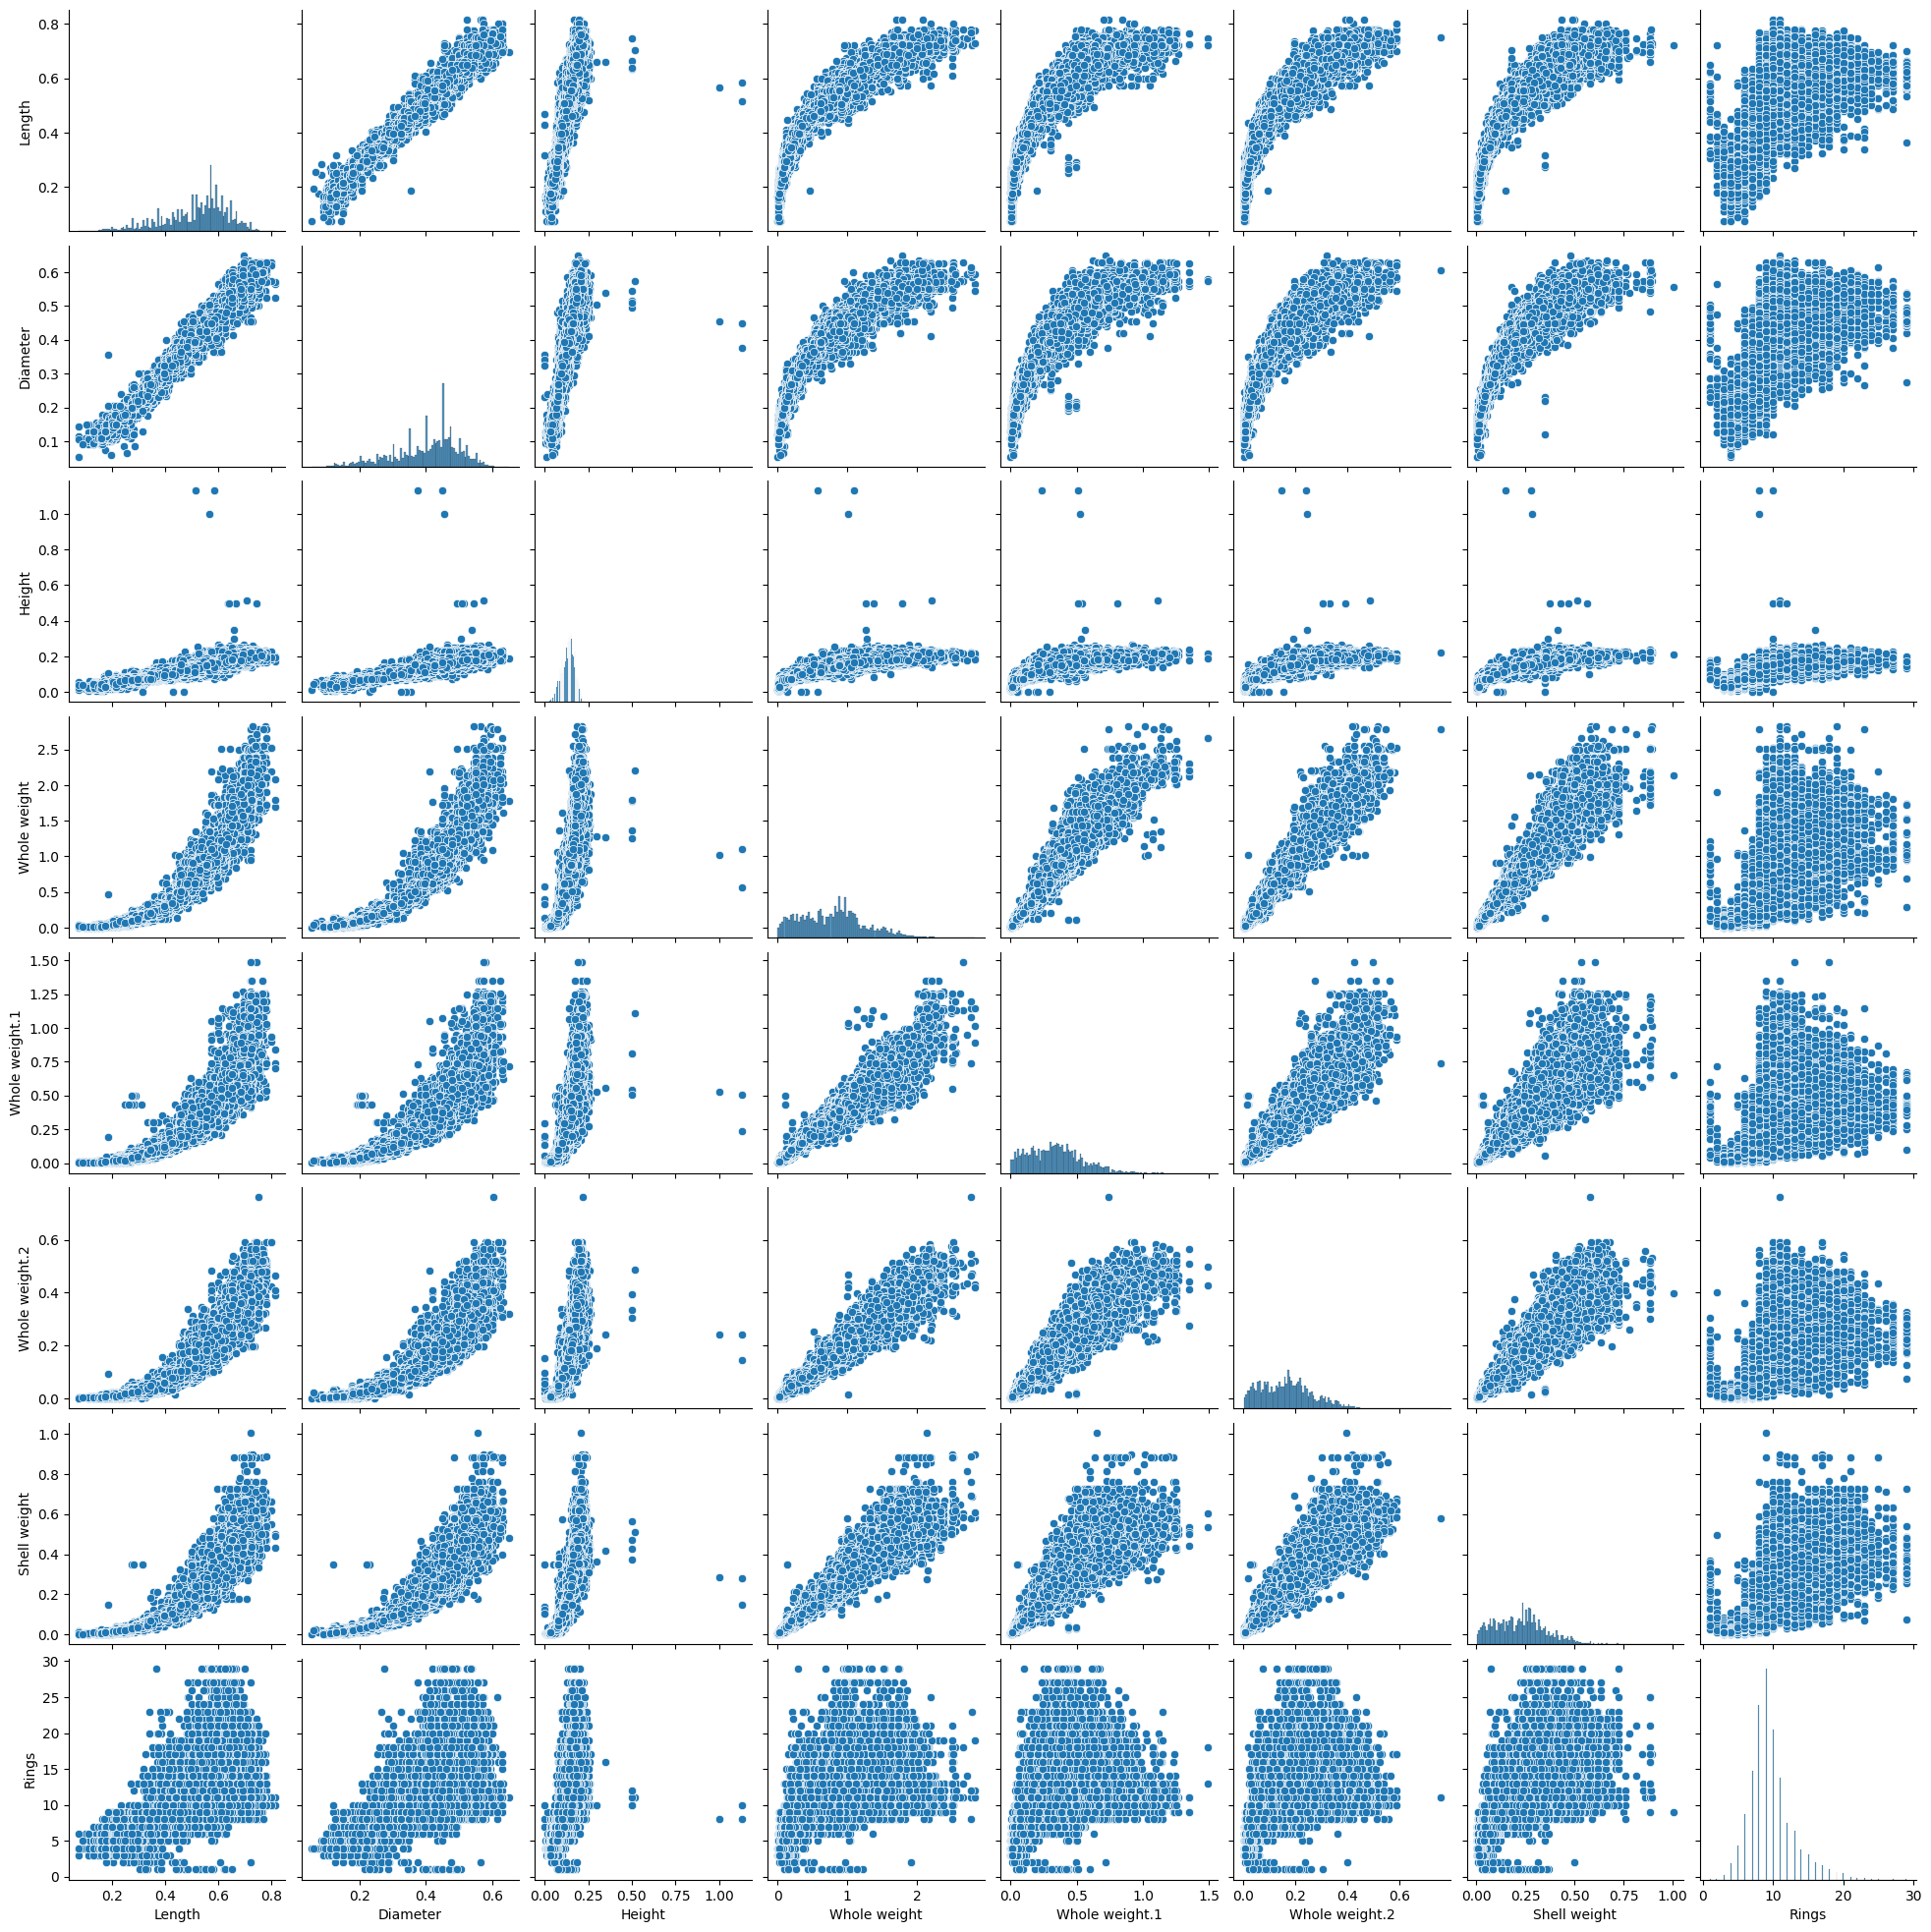

In [33]:
data = train_data.replace([np.inf, -np.inf], np.nan)  # Replace inf and -inf with NaN

data1 = data[variables]
sns.pairplot(data1)
plt.show()

# **Multicollinearity Check**

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

predictors = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']

# Add a constant column to the data
data_with_const = add_constant(train_data[predictors])

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = data_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(data_with_const.values, i) for i in range(data_with_const.shape[1])]

# Display the VIF data
print(vif_data)

         Variable        VIF
0           const  65.276713
1          Length  51.163177
2        Diameter  53.849255
3          Height   7.778080
4    Whole weight  69.215430
5  Whole weight.1  21.378950
6  Whole weight.2  19.968883
7    Shell weight  18.325664


# **Linear Regression**

The overall linear regression are made to show if there's any significant effect from predictors to Y.

In [35]:
import statsmodels.api as sm
X = train_data[predictors]
X = sm.add_constant(X)
y = train_data['Rings']

model = sm.OLS(y, X).fit()

# summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                 1.936e+04
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:39:28   Log-Likelihood:            -1.9186e+05
No. Observations:               90615   AIC:                         3.837e+05
Df Residuals:                   90607   BIC:                         3.838e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.8305      0.054     52.

The p-value is 0.00. If we use alpha level of 0.05, this indicates that all combined predictors significantly affect the number of abalone rings. However, some of the predictor coefficients negative effects towards abalone age, which contradicts the correlation matrix. In the correlation matrix, all predictors have positive value correlation with abalone age.

From here, we can conclude that linear regression is not suitable due to high multicollinearity. This multicollinearity can lead into biased result in this model.

# **NORMALIZATION**

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data[predictors])
train_data_normalized = pd.DataFrame(train_data_normalized, columns=predictors)
train_data_normalized.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,0.641892,0.630252,0.132743,0.272534,0.220242,0.192232,0.237668
1,0.750000,0.731092,0.128319,0.399504,0.307330,0.363397,0.317389
2,0.114865,0.092437,0.022124,0.006729,0.003026,0.003292,0.003488
3,0.702703,0.705882,0.132743,0.323180,0.251849,0.269914,0.247633
4,0.648649,0.621849,0.115044,0.276253,0.247814,0.210007,0.195316


# **DECISION TREE**


Backward elimination is a technique used in feature selection to simplify a model by iteratively removing features that have the least impact on the model's performance

In [37]:
# Backward elimination decision Tree by RMLSE to get best model

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor

# RMSLE Function
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Split your data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initial set of features
selected_features = X.columns.tolist()

# Function to evaluate the model
def evaluate_model(features):
    if not features:  # Check if there are no features left
        return float('inf')  # Return a high RMSLE score if no features
    X_subset = X_train[features]
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_subset, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_val[features])
    return rmsle(y_val, y_pred)

# Initialize RMSLE with a large value
best_rmsle = float('inf')

# Continue looping until no further improvement in RMSLE
while True:
    removed_feature = None
    for feature in selected_features:
        # Temporarily remove one feature
        reduced_features = selected_features.copy()
        reduced_features.remove(feature)

        # Evaluate the model without this feature
        rmsle_score = evaluate_model(reduced_features)

        print(f"Removing {feature}, new RMSLE: {rmsle_score}")  # Debugging output

        # Check if this new model improves the RMSLE value
        if rmsle_score < best_rmsle:
            best_rmsle = rmsle_score
            selected_features = reduced_features
            removed_feature = feature

    # If no feature was removed in this iteration, exit the loop
    if removed_feature is None:
        break

print("Selected features:", selected_features)
print("Best RMSLE:", best_rmsle)

Removing const, new RMSLE: 0.21712535311978318
Removing Length, new RMSLE: 0.21777248682840972
Removing Diameter, new RMSLE: 0.215890111042281
Removing Height, new RMSLE: 0.21867727854201396
Removing Whole weight, new RMSLE: 0.2209176012040996
Removing Whole weight.1, new RMSLE: 0.22836007276282744
Removing Whole weight.2, new RMSLE: 0.21745842325071185
Removing Shell weight, new RMSLE: 0.23336307563493364
Removing Length, new RMSLE: 0.21714082875930033
Removing Height, new RMSLE: 0.21867727854201396
Removing Whole weight, new RMSLE: 0.2209176012040996
Removing Whole weight.1, new RMSLE: 0.22836007276282744
Removing Whole weight.2, new RMSLE: 0.21745842325071185
Removing Shell weight, new RMSLE: 0.23336307563493364
Selected features: ['Length', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']
Best RMSLE: 0.215890111042281


# **XG Boost**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
import numpy as np

# RMSLE Function
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Split your data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initial set of features
selected_features_gb = X.columns.tolist()

# Function to evaluate the model
def evaluate_model_gb(features):
    X_subset = X_train[features]
    model_gb = GradientBoostingRegressor(random_state=42)
    model_gb.fit(X_subset, y_train)

    # Make predictions on the validation set
    y_pred = model_gb.predict(X_val[features])
    return rmsle(y_val, y_pred), mean_squared_error(y_val, y_pred)  # Return both RMSLE and MSE

# Initialize RMSLE and MSE with large values
best_rmsle_gb = float('inf')
best_mse_gb = float('inf')

# Continue looping until no further improvement in RMSLE
while True:
    removed_feature = None
    for feature in selected_features_gb:
        # Temporarily remove one feature
        reduced_features = selected_features_gb.copy()
        reduced_features.remove(feature)

        # Evaluate the model without this feature
        rmsle_score, mse_score = evaluate_model_gb(reduced_features)

        print(f"Removing {feature}, new RMSLE: {rmsle_score}, new MSE: {mse_score}")  # Debugging output

        # Check if this new model improves the RMSLE value
        if rmsle_score < best_rmsle_gb:
            best_rmsle_gb = rmsle_score
            best_mse_gb = mse_score  # Update the best MSE as well
            selected_features_gb = reduced_features
            removed_feature = feature

    # If no feature was removed in this iteration, exit the loop
    if removed_feature is None:
        break

print("Selected features:", selected_features_gb)
print("Best RMSLE:", best_rmsle_gb)
print("Best MSE:", best_mse_gb)

Removing const, new RMSLE: 0.15657962176504706, new MSE: 3.7121525663390034
Removing Length, new RMSLE: 0.1568226864373611, new MSE: 3.7244735223464116
Removing Diameter, new RMSLE: 0.15663123180796706, new MSE: 3.7184586863074442
Removing Height, new RMSLE: 0.1573230731231318, new MSE: 3.745352126535212
Removing Whole weight, new RMSLE: 0.15754003555187013, new MSE: 3.7677741524241473
Removing Whole weight.1, new RMSLE: 0.16484642863818022, new MSE: 4.166980469488502
Removing Whole weight.2, new RMSLE: 0.1566508826454503, new MSE: 3.7172941659560537
Removing Shell weight, new RMSLE: 0.16495957104397435, new MSE: 4.151713361073055
Removing Length, new RMSLE: 0.1568226864373611, new MSE: 3.7244735223464116
Removing Diameter, new RMSLE: 0.15663123180796706, new MSE: 3.7184586863074442
Removing Height, new RMSLE: 0.1573230731231318, new MSE: 3.745352126535212
Removing Whole weight, new RMSLE: 0.15754003555187013, new MSE: 3.7677741524241473
Removing Whole weight.1, new RMSLE: 0.1648464286

# Conclusion

Both Decision tree method and XG Boost resulting 6 variables is best to predict the Abalone rings, that are 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', and 'Shell weight'.

The lowest RMSLE is produced when XG Boost are used, so, this method was chosen over Decision Tree.

# Prediction Using Best Model

In [48]:
# Using the selected features from the feature selection process
final_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model on the entire training set with the selected features
final_model.fit(X_train[selected_features_gb], y_train)

# Make predictions on the validation set to evaluate performance
y_val_pred = final_model.predict(X_val[selected_features_gb])

# Calculate and print the RMSLE and MSE for the validation set
val_rmsle = rmsle(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation RMSLE: {val_rmsle}")
print(f"Validation MSE: {val_mse}")

# Now make predictions on the test set
X_test = test_data[selected_features_gb]  # Ensure you only use the selected features
test_data['Rings'] = final_model.predict(X_test)

# Create a submission DataFrame
submission = test_data[['id', 'Rings']]

# Save the submission to a CSV file (optional)
submission.to_csv('submission.csv', index=False)

print(submission.head())

Validation RMSLE: 0.15478115729573982
Validation MSE: 3.6094418499409415
      id      Rings
0  90615   9.780668
1  90616   9.467126
2  90617  10.441419
3  90618  10.534013
4  90619   7.681647
